# 3장. 신경망 (계속)

## 손글씨 숫자 인식

지금까지 배운걸로 추론하는 신경망을 구현해보자. (학습기능은 더 뒤에서 배운다.)

추론은 신경망의 `순전파(forward propagation)` 이라고 부르기도 한다.

In [12]:
import sys, os
import numpy as np
import pickle
from PIL import Image
from IPython.display import display

In [13]:
sys.path.append(os.pardir)
from dataset.mnist import load_mnist      # 저자가 load_mnist를 미리 만들어주심

In [14]:
(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True,
                                                  normalize=False)
print(x_train.shape, t_train.shape, x_test.shape, t_test.shape)

(60000, 784) (60000,) (10000, 784) (10000,)


In [16]:
# 이미지 들여다보자.

def img_show(img):
    pilimg = Image.fromarray(np.uint8(img))
    display(pilimg)

    
img_show(x_train[0].reshape(28,28))    # 28*28 = 784
print(t_train[0])

5


In [17]:
for i in range(0,3):
    img_show(x_train[i].reshape(28,28))    # 28*28 = 784
    print(t_train[i])                      

5


0


4


In [18]:
def get_data():
    (x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, 
                                                      normalize=True, 
                                                      one_hot_label=False)
    return x_test, t_test


# 저자가 만들어둔 sample_weight.pkl 를 로딩한다.
def init_network():
    with open('sample_weight.pkl', 'rb') as f:
        network = pickle.load(f)
    return network


def sigmoid(x):
    return 1 / (1+np.exp(-x))


def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a - c)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    return y


# 추론 함수
def predict(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = softmax(a3)
    return y    

In [19]:
# mnist 에서 이미지 하나씩 가져다가 추론하고 비교한다.

acc_cnt = 0
x, t = get_data()
network = init_network()

for i in range(len(x)):
    y = predict(network, x[i])
    if np.argmax(y) == t[i]:    # y배열에서 제일 큰 값과 라벨을 비교
        acc_cnt += 1
        
print('acc'+str(float(acc_cnt)/ len(x)))

acc0.9352


## 배치 처리
아래는 그림 한장을 넣는 모습

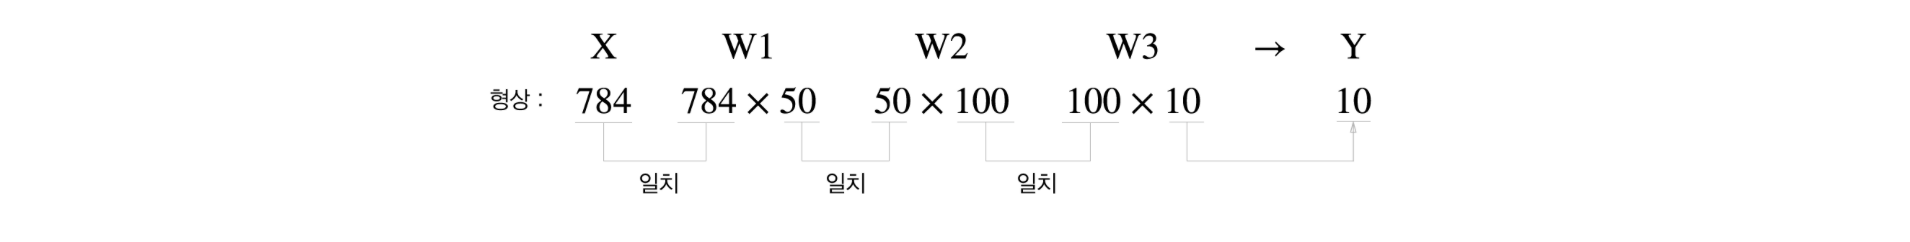

아래는 배치로 100장씩 처리

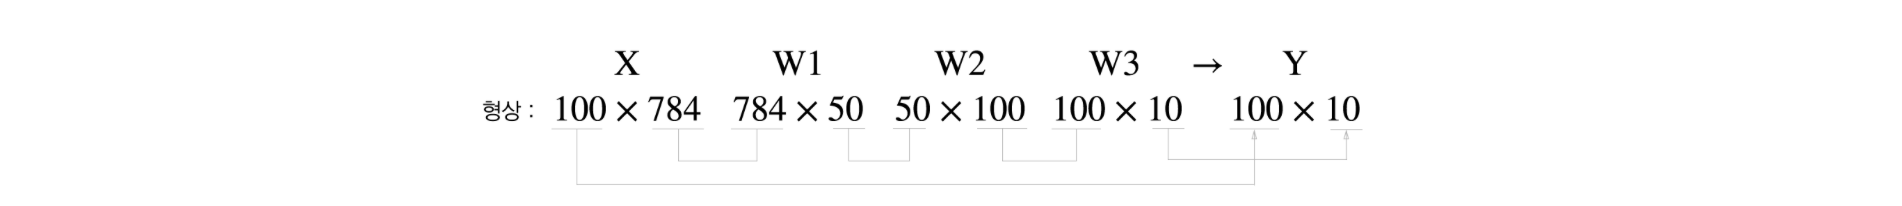

In [20]:
# mnist 에서 이미지 100개씩 가져다 추론하고 비교한다.

batch_size = 100
acc_cnt = 0

for i in range(0, len(x), batch_size):
    x_batch = x[i:i+batch_size]
    y_batch = predict(network, x_batch)
    p = np.argmax(y_batch, axis=1)
    acc_cnt += np.sum(p == t[i:i+batch_size])

print('acc'+ str(float(acc_cnt)/len(x)))

acc0.9352


## 정규화

실제 서비스에서는 데이터를 다듬어줄 (정규화) 필요가 있는데, `load_mnist`에 normalize 인자를 주면 `0~255`를 `0~1.0`으로 만들어준다. 일반적으로는 데이터를 0을 중심으로 분포하게 이동시키거나, 데이터 확산 범위를 제한하는 기법을 쓴다.